### Select the Right Threshold values using ROC Curve

In [3]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification 




In [4]:
# To generate the synthetic dataset
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1) # create 2000 data points of 2 classes i.e 0 and 1 having equal wights means no. of data points on both the classes should be equal means 1000 and 1000.

In [25]:
X

array([[-0.62070677,  1.39769519,  0.1034997 , ..., -0.34409714,
         0.62197727, -1.79645246],
       [ 0.90592186,  1.9199751 , -0.7783715 , ..., -1.30560469,
        -1.54476766, -0.24532071],
       [ 0.27902104,  0.85887666,  1.20780417, ...,  2.50374447,
        -0.16497195, -1.95912025],
       ...,
       [ 0.40426899, -0.61988039,  0.87588292, ...,  0.61529851,
         0.97573222,  1.77717222],
       [-0.02512151, -1.05618212, -0.2345739 , ..., -1.6839064 ,
        -0.33327389,  1.13979455],
       [-1.46739126, -0.12314487,  0.66858242, ...,  1.92945851,
        -0.97878106, -2.77522263]])

In [5]:
X.shape  # By deault it contains 20 features

(2000, 20)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1) # Perform train test split where test data is 30%

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Logistic Regression

In [18]:
# Train the sata w.r.t Logistic regression
# Here by default probability is 0.5
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)


LogisticRegression()

In [19]:
log_classifier.predict_proba(X_train) # Probablity of  getting 0 and 1 

array([[9.99688479e-01, 3.11520635e-04],
       [9.99966000e-01, 3.39995695e-05],
       [2.09976771e-02, 9.79002323e-01],
       ...,
       [8.58463348e-01, 1.41536652e-01],
       [9.99422335e-01, 5.77665099e-04],
       [6.07714035e-01, 3.92285965e-01]])

In [13]:

log_classifier.predict_proba(X_train)[:,1] # Probability w.r.t 1

array([3.11520635e-04, 3.39995695e-05, 9.79002323e-01, ...,
       1.41536652e-01, 5.77665099e-04, 3.92285965e-01])

In [20]:
# Get the ROC AUC curve area 
ytrain_pred = log_classifier.predict_proba(X_train)  # It basically predicts the probability if it is >0.5 it will take as 1.
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1]))) # It computes TPR(True Positive Rate) and FPR(False positive rate) curve. And gives the area it has covered in %.
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Now we will focus on selecting the best threshold for maximum accuracy

In [21]:
pred=[] # Take a list of predictions
for model in [log_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1])) # For this particular model do all the append in the form of series in test data.
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9885777777777777


In [27]:
final_prediction # Final prediction w.r.t 1

0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64

In [28]:
#### Calculate the ROc Curve

# Here it gives the vaue of all the FPR, TPR and Threshold value
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds         # all the threshold values

array([1.99970150e+00, 9.99701500e-01, 9.96158877e-01, 9.96129645e-01,
       9.47070326e-01, 9.46204924e-01, 8.65466258e-01, 8.63536252e-01,
       8.53176377e-01, 8.50056757e-01, 8.41421435e-01, 8.39367909e-01,
       8.15506733e-01, 8.14031083e-01, 7.10421057e-01, 6.95370907e-01,
       6.71015565e-01, 6.37604614e-01, 6.28000190e-01, 6.25419393e-01,
       5.85991638e-01, 5.72811301e-01, 5.44222421e-01, 5.09091565e-01,
       5.05747727e-01, 4.25206094e-01, 4.00497635e-01, 3.57672321e-01,
       3.57418343e-01, 3.08833885e-01, 3.04354181e-01, 2.98609914e-01,
       2.96733938e-01, 2.62534344e-01, 2.58894947e-01, 2.46055520e-01,
       2.13787155e-01, 8.32534990e-02, 8.12384385e-02, 5.22202002e-06,
       4.99437632e-06, 2.17237065e-07])

In [29]:
fpr    # All the fpr values

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.01      , 0.01      , 0.01333333,
       0.01333333, 0.01666667, 0.01666667, 0.02      , 0.02      ,
       0.02333333, 0.02333333, 0.03      , 0.03      , 0.03333333,
       0.03333333, 0.03666667, 0.03666667, 0.04      , 0.04      ,
       0.05666667, 0.05666667, 0.06333333, 0.06333333, 0.07666667,
       0.07666667, 0.08      , 0.08      , 0.09      , 0.09      ,
       0.1       , 0.1       , 0.17      , 0.17      , 0.95666667,
       0.95666667, 1.        ])

In [32]:
tpr    # All the tpr values

array([0.        , 0.00333333, 0.11      , 0.11      , 0.65666667,
       0.65666667, 0.81      , 0.81      , 0.83      , 0.83      ,
       0.84333333, 0.84333333, 0.87333333, 0.87333333, 0.93666667,
       0.93666667, 0.95      , 0.95      , 0.95333333, 0.95333333,
       0.96333333, 0.96333333, 0.97      , 0.97      , 0.97333333,
       0.97333333, 0.97666667, 0.97666667, 0.98      , 0.98      ,
       0.98333333, 0.98333333, 0.98666667, 0.98666667, 0.99      ,
       0.99      , 0.99333333, 0.99333333, 0.99666667, 0.99666667,
       1.        , 1.        ])

### Wherever threshold is high we are going to select that particular accuracy
Select the best threshold and find the best accuracy

In [16]:

from sklearn.metrics import accuracy_score
# Get all the accuracy list w.r.t threshold
accuracy_ls = []   # Create an acuuracy list
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0) # Wherever final_prediction is grater than thres make it 1 else make it 0.
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True)) # Append the accuracy score for yhe particular prediction.
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.439728,0.960000
28,0.454506,0.960000
24,0.548559,0.960000
30,0.439603,0.958333
27,0.486169,0.958333


In [17]:
accuracy_ls

,thresholds,accuracy
29,0.439728,0.960000
28,0.454506,0.960000
24,0.548559,0.960000
30,0.439603,0.958333
27,0.486169,0.958333
25,0.528779,0.958333
26,0.516159,0.956667
23,0.567362,0.955000
22,0.567447,0.953333
21,0.580504,0.946667


### Draw the ROC curve using fpr and tpr

In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') # fpr and tpr va;ues lies b/w 0 to 1.
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

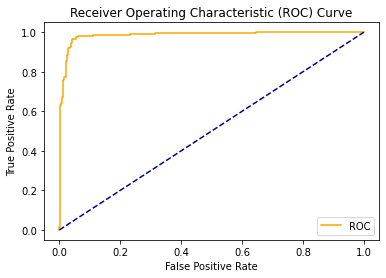

In [19]:
plot_roc_curve(fpr,tpr)